<a href="https://colab.research.google.com/github/nhatanh81096/cs480student/blob/main/04/Anh_Vo_CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

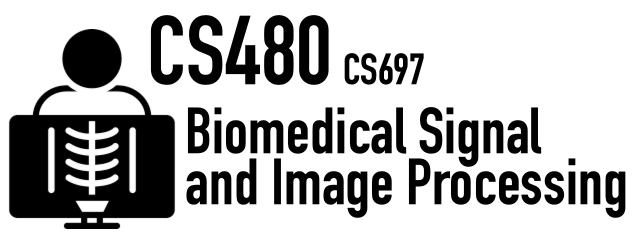
#Assignment 4

In [1]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [2]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we are using mahotas again, so lets install it!
!pip install mahotas

     |████████████████████████████████| 5.7MB 3.7MB/s 


In [4]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [5]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [6]:
# Download the Dataset
!curl -O https://cs480.org/data/xray.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 61.4M  100 61.4M    0     0  40.7M      0  0:00:01  0:00:01 --:--:-- 40.7M


In [7]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [8]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg', as_grey=True)

In [9]:
# TODO: Please display this image and print the dimensions!

In [10]:
# TODO: YOUR CODE

In [11]:
print(f"Dimension: {img.shape}")

Dimension: (1858, 2090)


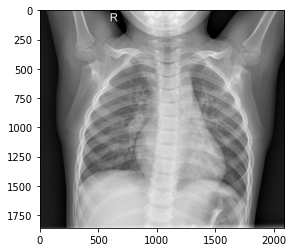

In [14]:
plt.imshow(img, cmap='gray')

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [15]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [16]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [17]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) Resizing (Scaling) the images to 300x300
# TODO: Operation 2) Stacking all the 2D images into 1 single 3D array 

In [18]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [19]:
# TODO: YOUR CODE

In [20]:
def show_images(images, num_of_images=5):
  fig, ax = plt.subplots(1, num_of_images, figsize=[25,25])
  for i in range(num_of_images):
    ax[i].set_title('Image %d' %i)
    ax[i].imshow(images[i], cmap='gray')
    ax[i].axis('off')
  plt.show()

First 5 normal images


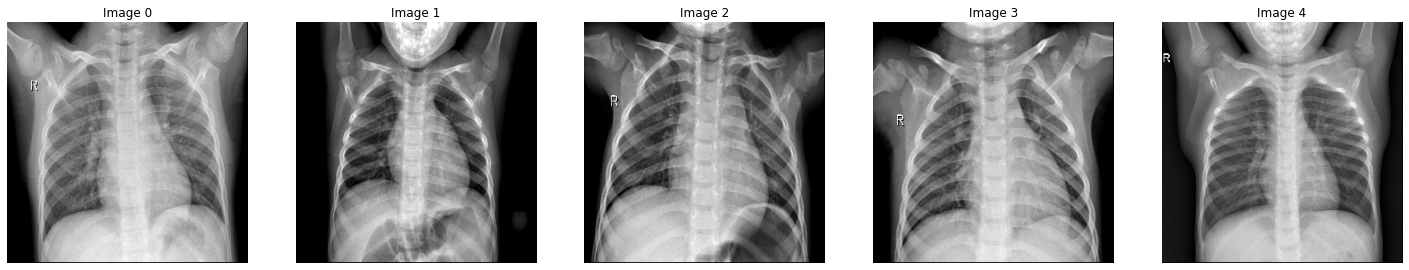

In [21]:
print("First 5 normal images")
show_images(normal_images)

First 5 pneumonia images


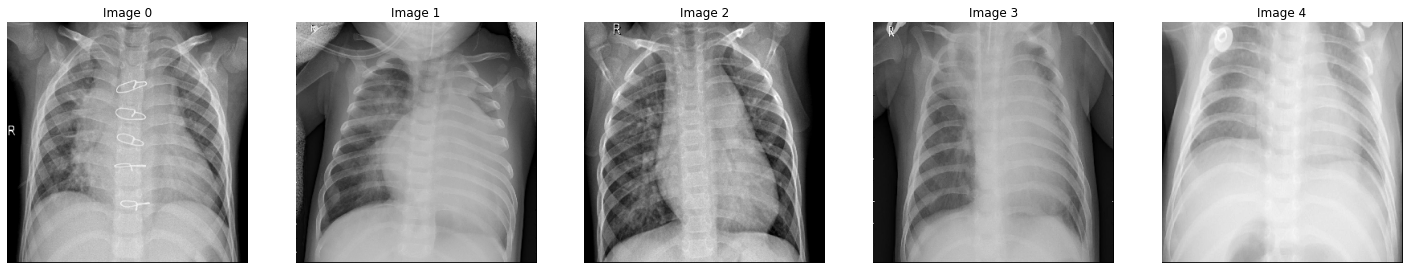

In [22]:
print("First 5 pneumonia images")
show_images(pneumonia_images)

**Task 3:** Setup training and testing data. [15 Points]

In [23]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [24]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [25]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
# TODO
training_target = np.zeros(TRAINING_COUNT*2)
training_target[TRAINING_COUNT:] += 1

print("Training Normal target: ", training_target[:TRAINING_COUNT])
print("Training Pneumonia target: ", training_target[TRAINING_COUNT:])

Training Normal target:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Training Pneumonia target:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [26]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [27]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
testing_target = np.zeros(TESTING_COUNT*2)
testing_target[TESTING_COUNT:] += 1

print("Testing Normal target: ", testing_target[:TESTING_COUNT])
print("Testing Pneumonia target: ", testing_target[TESTING_COUNT:])

Testing Normal target:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Testing Pneumonia target:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [64]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [65]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [66]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [67]:
# TODO: YOUR ANSWER

In the Random Forest algorithm, multiple (hundreds or thousands) of random decision trees are generated. Each decision tree will make the prediction on whether a given sample is normal or pneumonia. Then, the algorithm will take the majority of the votes of all the created trees and produce the final prediction.

In [68]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.8875

In [69]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [70]:
# TODO: YOUR ANSWER

The accuracy is pretty good. I am not really surprised by this as we only trained and test on a small data set. Probably, they come from the same distribution. Thus, it may be underfitting. 

**Bonus:** Let's take a closer look! [33 Points]

In [71]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

In [72]:
# TODO: YOUR CODE AND YOUR ANSWER

In [88]:
predictions = clf.predict(testing_data)
print("Expected prediction: ", testing_target)
print("Actual prediction: ", predictions)
wrong_predictions = np.where(testing_target != predictions)[0]
print("Wrong classifications: ", wrong_predictions)

Expected prediction:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
Actual prediction:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
Wrong classifications:  [ 4  9 10 16 31 37 46 58 62]


In [93]:
# In the wrong classifications, indices smaller than 40 (testing count for each type) is from normal images. The remaining is from pneumonia images
# We need to calculate their indices from the original data set
normal_images_indices = wrong_predictions[wrong_predictions < 40]
pneumonia_images_indices = wrong_predictions[wrong_predictions >= 40]

# Then, we need to get their according indices in the original data set
normal_images_indices = normal_images_indices + TRAINING_COUNT
pneumonia_images_indices = pneumonia_images_indices - TESTING_COUNT + TRAINING_COUNT 

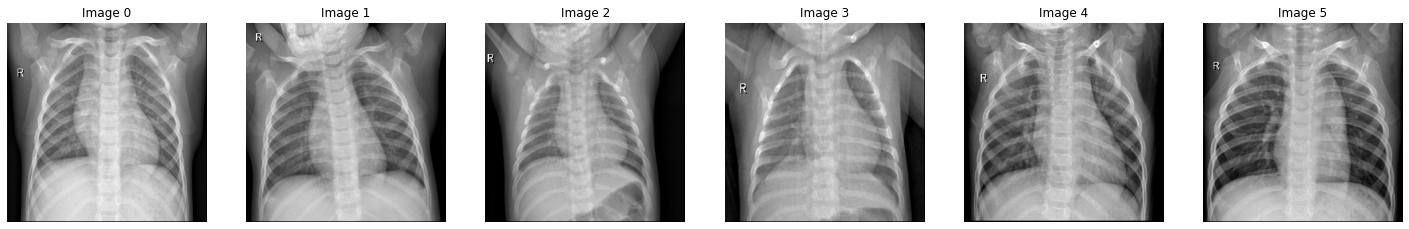

In [94]:
# Show the wrong predicted images 
show_images(normal_images[normal_images_indices], num_of_images= len(normal_images_indices))

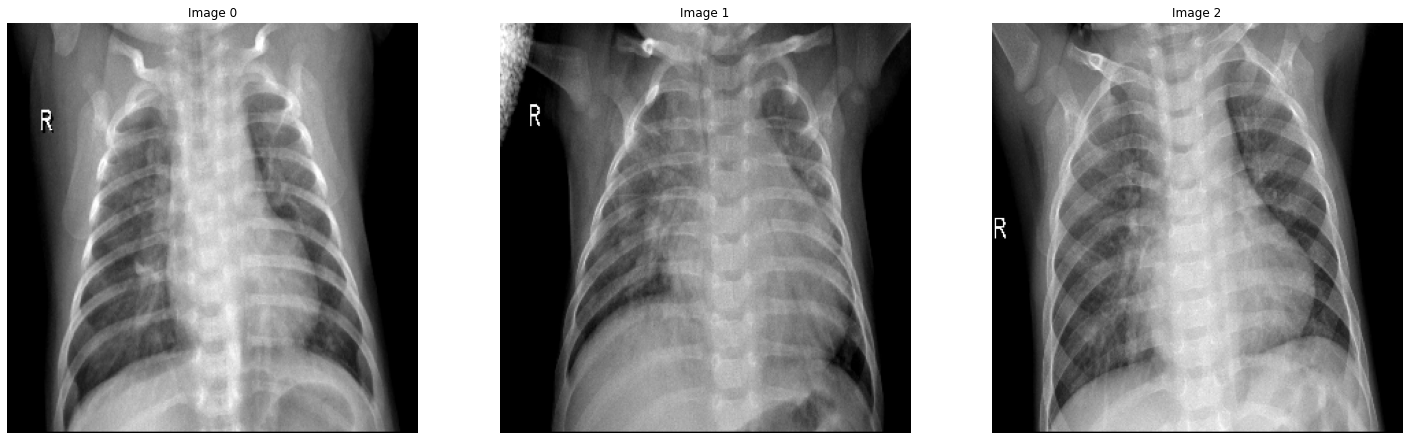

In [95]:
show_images(pneumonia_images[pneumonia_images_indices], len(pneumonia_images_indices))

Probably the reason behind wrong predictions is that they are really hard to tell which class does each image belong to. The pneumonia ones seem to be pretty normal. 




In [74]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [75]:
# TODO: YOUR ANSWER

We can further improve the classification performance by:
- Add more data to the training 
- Tune the hyper parameters of the algorithm e.g. number of trees, criterion, etc.
- Try a different algorithm 

In [87]:
my_clf = RandomForestClassifier(n_estimators=200)
my_fitted = my_clf.fit(training_data, training_target)
print("New accuracy: ", my_clf.score(testing_data, testing_target))

New accuracy:  0.9125


In [62]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw